## TASK 2
### UNEMPLOYMENT ANALYSIS WITH PYTHON

Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project.

DOWNLOAD DATASET FROM: https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india


In [65]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data = pd.read_csv('/content/Unemployment in India.csv')
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## General data analysis


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [68]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [69]:
data.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [70]:
data[data.isna().any(axis=1)].head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
data.dropna(inplace=True)

In [72]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [73]:
data.columns = data.columns.str.strip()
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [74]:
data.shape

(740, 7)

In [75]:
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-75-1a72a8b5b870>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


## Analysis of numerical variables

In [76]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)'],
      dtype='object')

In [77]:
# Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India
data['Estimated Unemployment Rate (%)'].describe()

count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: Estimated Unemployment Rate (%), dtype: float64

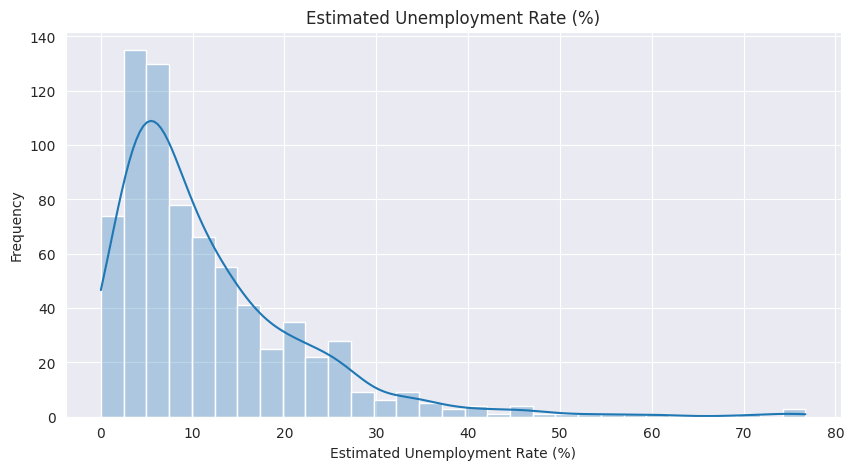

In [78]:
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.histplot(data=data, x='Estimated Unemployment Rate (%)', kde=True, alpha=0.3)
plt.title('Estimated Unemployment Rate (%)')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

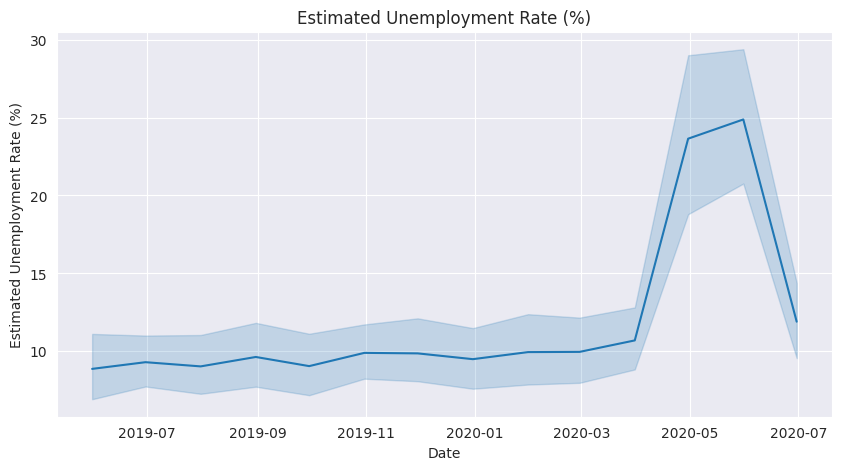

In [79]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Date', y='Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate (%)')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()


The graph illustrates the trend of the estimated unemployment rate over time. There's a notable spike in unemployment following March 2020, coinciding with the rapid spread and impact of the COVID-19 pandemic. This sharp increase indicates a significant economic downturn during that period. The data suggests that the pandemic had a substantial and immediate effect on unemployment rates, highlighting the vulnerability of economies to external shocks such as public health crises.

In [80]:
# Estimated Employed = count of people employed
data['Estimated Employed'].describe()

count    7.400000e+02
mean     7.204460e+06
std      8.087988e+06
min      4.942000e+04
25%      1.190404e+06
50%      4.744178e+06
75%      1.127549e+07
max      4.577751e+07
Name: Estimated Employed, dtype: float64

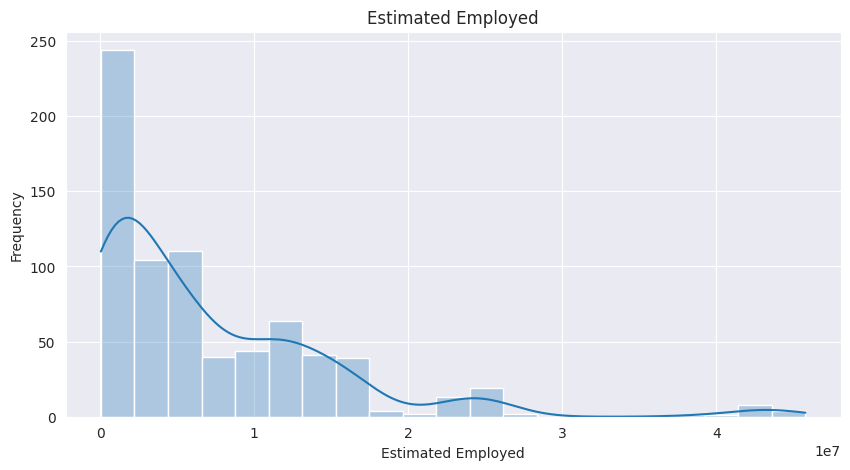

In [81]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Estimated Employed', kde=True, alpha=0.3)
plt.title('Estimated Employed')
plt.xlabel('Estimated Employed')
plt.ylabel('Frequency')
plt.show()

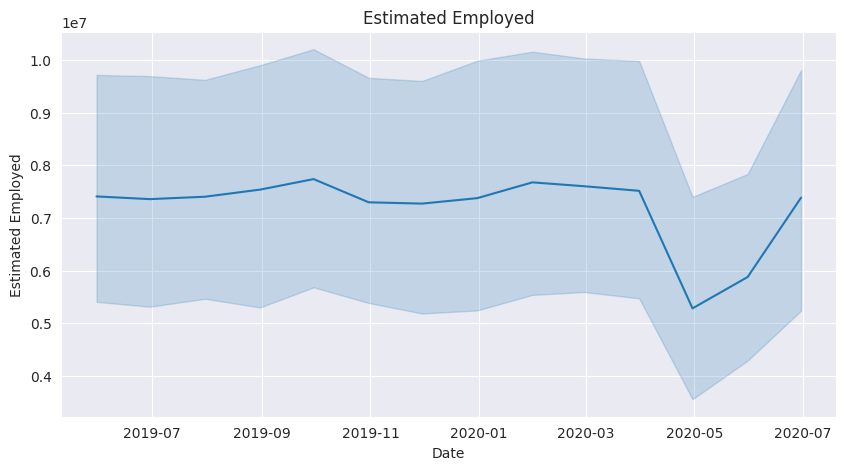

In [82]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Date', y='Estimated Employed')
plt.title('Estimated Employed')
plt.xlabel('Date')
plt.ylabel('Estimated Employed')
plt.show()

The graph displays the trend in the estimated number of employed individuals over time. There's a significant decline in the number of employed individuals around March 2020, coinciding with the onset of the COVID-19 pandemic. This abrupt decrease indicates a substantial impact on employment levels during that period. The data suggests that the pandemic led to a rapid reduction in employment, highlighting the severe economic repercussions of public health crises.

In [83]:
# Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the total number of people eligible to participate in the labor force force
data['Estimated Labour Participation Rate (%)'].describe()

count    740.000000
mean      42.630122
std        8.111094
min       13.330000
25%       38.062500
50%       41.160000
75%       45.505000
max       72.570000
Name: Estimated Labour Participation Rate (%), dtype: float64

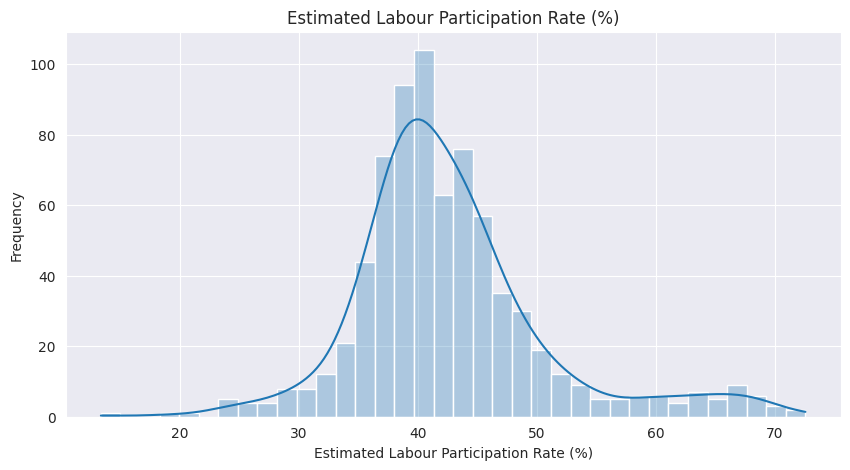

In [84]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Estimated Labour Participation Rate (%)', kde=True, alpha=0.3)
plt.title('Estimated Labour Participation Rate (%)')
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.show()

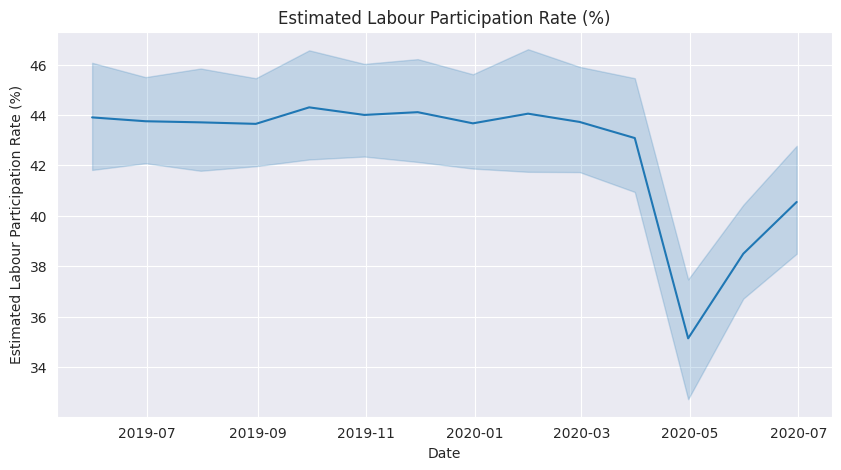

In [85]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Date', y='Estimated Labour Participation Rate (%)')
plt.title('Estimated Labour Participation Rate (%)')
plt.xlabel('Date')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.show()

The graph depicts the trend in the estimated labor force participation rate over time. It shows that the lowest participation rate occurred in May 2020, coinciding with the peak of the COVID-19 pandemic's impact. Subsequently, there's a gradual increase in the participation rate, indicating a slow recovery from the initial shock caused by COVID-19. Once again, the pandemic emerges as a significant factor influencing fluctuations in labor force participation, underscoring its profound effects on workforce dynamics.

In [86]:
data[numeric_columns].corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000


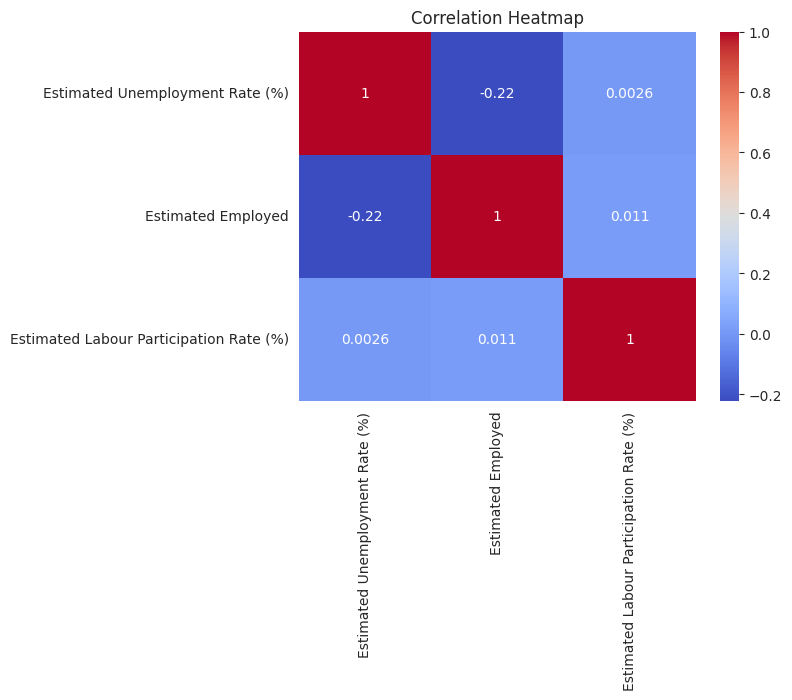

In [87]:
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Creating categorical variables

In [88]:
unemployment_status = ['Low', 'Medium', 'High']
quantile25 = data['Estimated Unemployment Rate (%)'].quantile(0.25)
quantile75 = data['Estimated Unemployment Rate (%)'].quantile(0.75)
conditions = [
    (data['Estimated Unemployment Rate (%)'] <= quantile25),
    (data['Estimated Unemployment Rate (%)'] > quantile25) & (data['Estimated Unemployment Rate (%)'] <= quantile75),
    (data['Estimated Unemployment Rate (%)'] > quantile75)
]
data['Unemployment Status'] = np.select(conditions, unemployment_status)
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Unemployment Status
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,Low
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,Low
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,Low
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,Low
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,Medium


## Analyzing categorical variables

In [89]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Region', 'Frequency', 'Area', 'Unemployment Status'], dtype='object')

In [90]:
data['Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [91]:
data['Frequency'] = data['Frequency'].str.strip()
data['Frequency'].unique()

array(['Monthly'], dtype=object)

In [107]:
data['Unemployment Status'].value_counts()

Unemployment Status
Medium    370
Low       185
High      185
Name: count, dtype: int64

<ipython-input-117-54be1542a025>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Unemployment Status', palette='Set2')


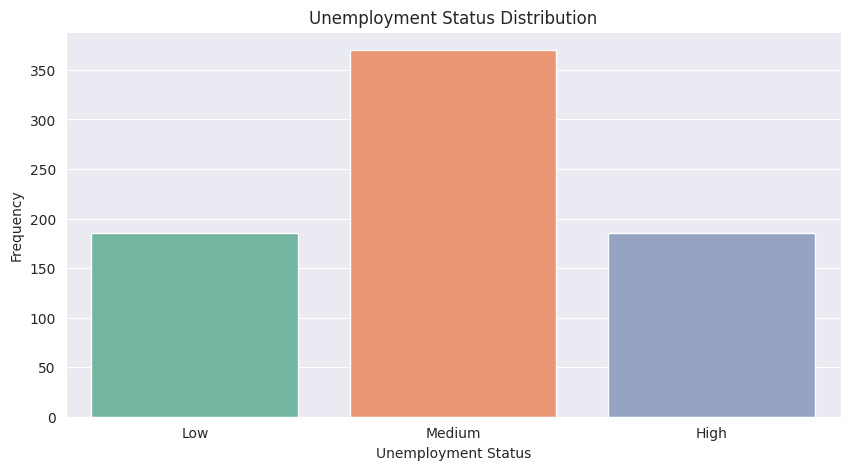

In [117]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Unemployment Status', palette='Set2')
plt.title('Unemployment Status Distribution')
plt.xlabel('Unemployment Status')
plt.ylabel('Frequency')
plt.show()

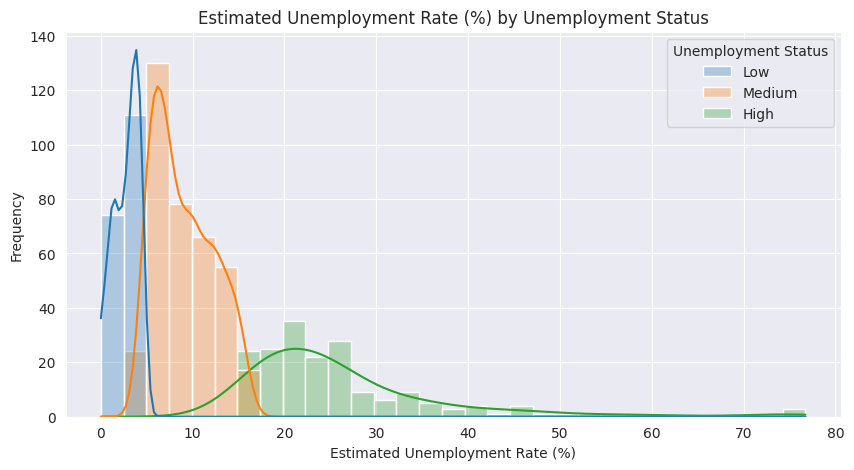

In [105]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Estimated Unemployment Rate (%)', kde=True, alpha=0.3, hue='Unemployment Status')
plt.title('Estimated Unemployment Rate (%) by Unemployment Status')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

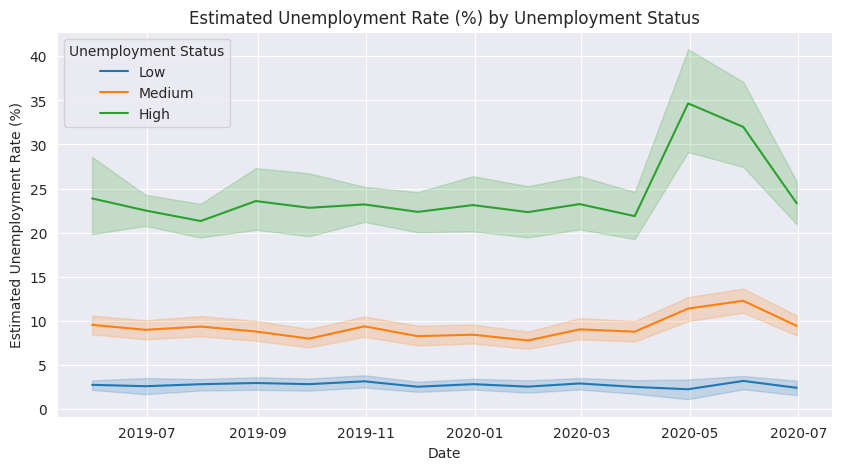

In [106]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Date', y='Estimated Unemployment Rate (%)', hue='Unemployment Status')
plt.title('Estimated Unemployment Rate (%) by Unemployment Status')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

During the COVID-19 pandemic, the unemployment rate among individuals with high social status significantly increased, as evidenced by the rise in the "high status" line on the graph.

In [92]:
data['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [94]:
data.Region.value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [123]:
regions_sorted_unemployment = data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
regions_sorted_unemployment

Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Punjab              12.031071
Puducherry          10.215000
Kerala              10.123929
Tamil Nadu           9.284286
Goa                  9.274167
Chhattisgarh         9.240357
West Bengal          8.124643
Telangana            7.737857
Maharashtra          7.557500
Andhra Pradesh       7.477143
Madhya Pradesh       7.406429
Sikkim               7.249412
Karnataka            6.676071
Gujarat              6.663929
Uttarakhand          6.582963
Assam                6.428077
Odisha               5.657857
Meghalaya            4.798889
Name: Estimated Unemployment Rate (%), dtype: float64

<ipython-input-128-fc11bee4ddcc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regions_sorted_unemployment.index[:10], y=regions_sorted_unemployment.values[:10], palette='Set2')


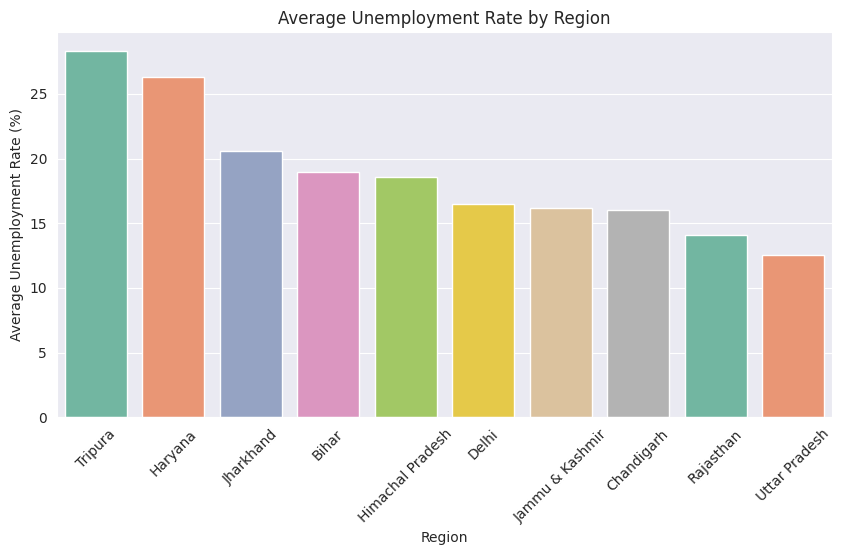

In [128]:
plt.figure(figsize=(10, 5))
sns.barplot(x=regions_sorted_unemployment.index[:10], y=regions_sorted_unemployment.values[:10], palette='Set2')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

Here are the cities with the highest unemployment rates, sorted in descending order:

1. Tripura: 28.35%
2. Haryana: 26.28%
3. Jharkhand: 20.59%
4. Bihar: 18.92%
5. Himachal Pradesh: 18.54%

These cities exhibit the highest levels of unemployment, indicating potential economic challenges within these regions.

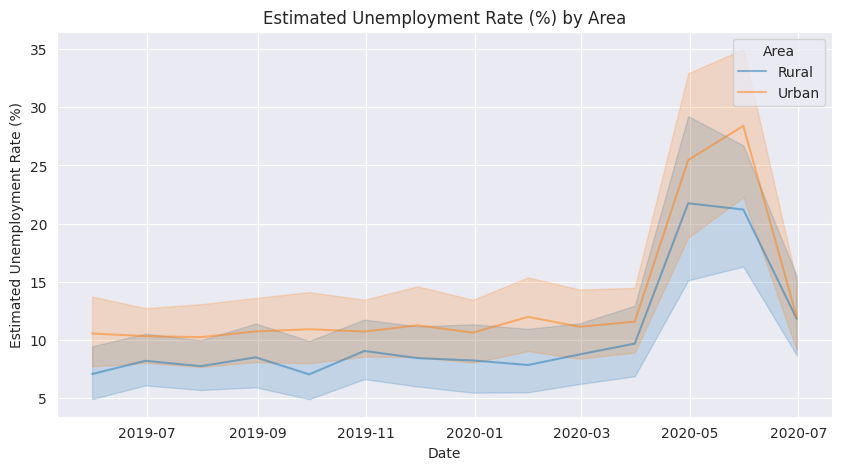

In [140]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Date', y='Estimated Unemployment Rate (%)', hue='Area', alpha=0.5)
plt.title('Estimated Unemployment Rate (%) by Area')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

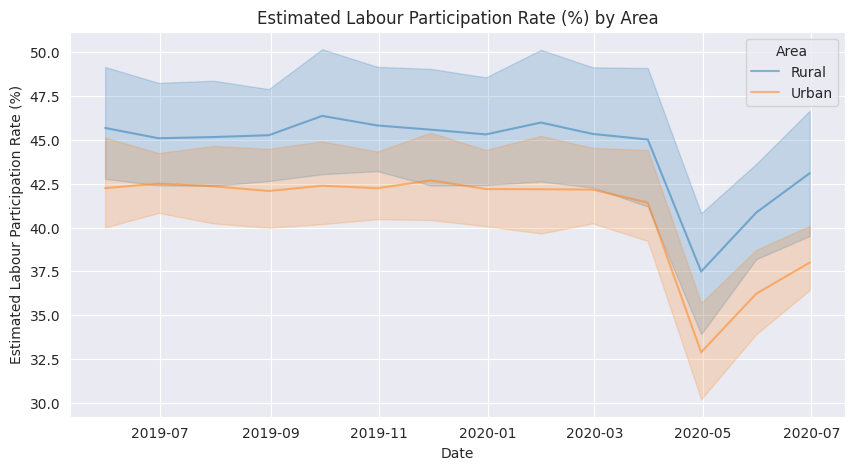

In [143]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Date', y='Estimated Labour Participation Rate (%)', hue='Area', alpha=0.5)
plt.title('Estimated Labour Participation Rate (%) by Area')
plt.xlabel('Date')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.show()

In [144]:
data.groupby('Area')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

Area
Urban    13.166614
Rural    10.324791
Name: Estimated Unemployment Rate (%), dtype: float64

The graph illustrates the trend in the estimated unemployment rate over time, segmented by locality ("Urban" and "Rural"). Overall, it's noticeable that the unemployment rate tends to be higher in urban areas compared to rural areas. While both areas experienced a significant increase in unemployment rates around May 2020, as depicted on the graph, it is evident that the situation has begun to stabilize in rural areas, whereas urban areas continue to face challenges in reducing unemployment.

## Analyzing data during the covid peak

In [147]:
data_covid = data[(data['Date'] >= '2020-04-01') & (data['Date'] <= '2020-06-30')]
data_covid.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Unemployment Status
11,Andhra Pradesh,2020-04-30,Monthly,16.29,8792827.0,36.03,Rural,High
12,Andhra Pradesh,2020-05-31,Monthly,14.46,9526902.0,38.16,Rural,Medium
13,Andhra Pradesh,2020-06-30,Monthly,0.85,15572975.0,53.76,Rural,Low
24,Assam,2020-05-31,Monthly,9.38,9926176.0,50.00,Rural,Medium
25,Assam,2020-06-30,Monthly,0.00,7544937.0,34.38,Rural,Low


In [152]:
regions_covid = data_covid.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
regions_covid

Region
Puducherry          57.700000
Jharkhand           44.896667
Haryana             37.693333
Bihar               36.988333
Tamil Nadu          31.735000
Tripura             26.053333
Delhi               24.165000
Kerala              20.938333
Uttar Pradesh       19.561667
Karnataka           19.155000
Telangana           18.635000
Rajasthan           18.413333
Madhya Pradesh      17.761667
Punjab              16.083333
Goa                 15.890000
Andhra Pradesh      15.778333
Maharashtra         15.415000
Himachal Pradesh    15.400000
Chhattisgarh        14.846667
West Bengal         13.733333
Odisha              11.866667
Gujarat             11.681667
Jammu & Kashmir     11.383333
Meghalaya            9.086000
Uttarakhand          8.926667
Chandigarh           7.220000
Sikkim               6.792000
Assam                6.388000
Name: Estimated Unemployment Rate (%), dtype: float64

<ipython-input-154-a942d8068fff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regions_covid.index[:10], y=regions_covid.values[:10], palette='Set2')


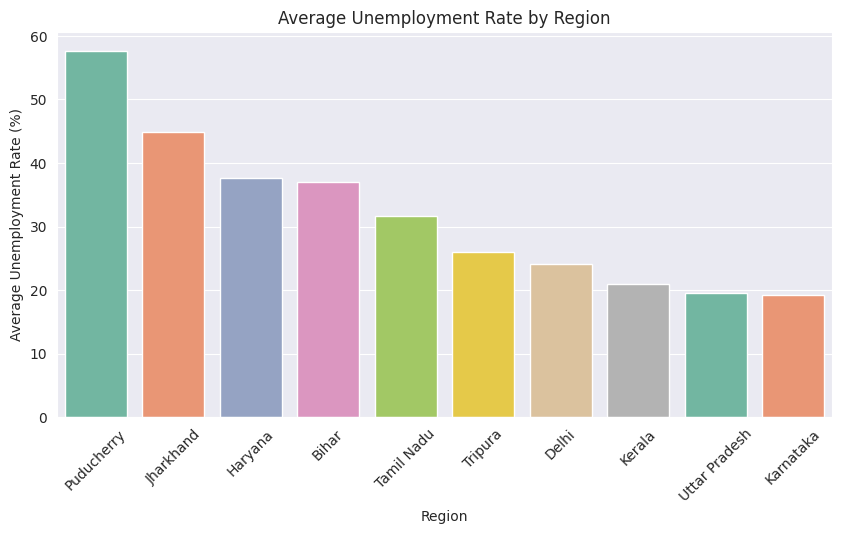

In [154]:
plt.figure(figsize=(10, 5))
sns.barplot(x=regions_covid.index[:10], y=regions_covid.values[:10], palette='Set2')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

Looking at the data, it's evident that there has been a substantial change in unemployment rates during the COVID-19 period compared to the overall time frame. Regions such as Puducherry, Jharkhand, and Haryana witnessed significant spikes in unemployment rates during the pandemic, with Puducherry experiencing the most pronounced increase. Conversely, regions like Tripura, Himachal Pradesh, and Telangana, which previously had lower unemployment rates, saw more moderate increases during the pandemic.

In [155]:
data_covid['Unemployment Status'].value_counts()

Unemployment Status
High      79
Medium    50
Low       23
Name: count, dtype: int64

During the COVID-19 peak, data indicates widespread unemployment challenges. With 79 regions facing high unemployment, 50 with medium levels, and only 23 maintaining low rates, the economic impact was severe. Urgent, targeted interventions are essential for recovery and resilience.

## Conclusions

Such work involved an in-depth analysis of unemployment patterns in India, particularly during the COVID-19 pandemic. It encompassed data loading, cleaning, and various exploratory data analysis techniques using Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn. The analysis delved into examining numerical and categorical variables, visualizing trends over time, and identifying key insights regarding regional unemployment rates and their fluctuations during the pandemic peak.